In [1]:
!pip install jieba wordcloud

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     --------------------------------------- 0.0/19.2 MB 991.0 kB/s eta 0:00:20
     ---------------------------------------- 0.1/19.2 MB 1.3 MB/s eta 0:00:15
     ---------------------------------------- 0.2/19.2 MB 1.6 MB/s eta 0:00:13
      --------------------------------------- 0.4/19.2 MB 2.0 MB/s eta 0:00:10
     - -------------------------------------- 0.7/19.2 MB 2.8 MB/s eta 0:00:07
     - -------------------------------------- 0.8/19.2 MB 2.9 MB/s eta 0:00:07
     -- ------------------------------------- 1.3/19.2 MB 3.8 MB/s eta 0:00:05
     -- ------------------------------------- 1.4/19.2 MB 4.0 MB/s eta 0:00:05
     ---- ----------------------------------- 2.4/19.2 MB 5.6 MB/s eta 0:00:04
     ----- ---------------------------------- 2.6/19.2 MB 5.4 MB/s eta 0:00:04
     ------ --------------------------------- 3.3/19.2 MB 6.2 MB/s eta 0:00:03
     ------- -------------------------------- 3.7/19.2 MB 

In [2]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [6]:
with open('科技教育文章.txt','r',encoding='ansi') as file:
    whole_text = file.read()
whole_text

'科技發展日新月異、影響人類生活甚鉅，肩負人才培育重責大任的教育機構，\n必無法自外於科技創新的腳步。因應教育科技發展之需，教育部自 2017 年 9 月 1\n日起至 2020 年 12 月 31 日止，將於三年內以 86 億元之經費，推動兩項數位建設相\n關「前瞻基礎建設計畫」。第一項為「強化數位教學暨學習資訊應用環境計畫」，預\n算經費為 60 億元，目標包含：1.所有中小學符合十二年國教科技領域課綱設備基\n準、2.所有中小學具有利於智慧學習之環境、3.開啟學生對新興科技之興趣、4.推動\n中小學學生程式設計學習、5.建置科技教學環境使學生能習得科技領域技能與素養\n（教育部，2017a）；第二項為「建置校園智慧網路計畫」，預算經費為 26 億元，目\n標包含：1.提升中小學校園網路支援教室具備豐富數位學習資源的高品質、2.促進\n學校提供順暢無礙的寬頻無線網路學習環境、3.建立縣市對學校整體網路智慧與自\n動化管理的機制與作業、4.提升學校師生享用雲端數位學習資源與服務、5.促成教\n師便利取用雲端化教學工具於課堂教學或參與社群共創教學典範（教育部，2017b），\n顯見投入科技資源為提升學習成效之重要議題。\n本文從使用科技學習、學習使用科技、援促科技之利、慎防科技之弊四方面，\n介紹 2017-2018 年各國教育科技應用之新動向，供教育主管機關實施資訊教育相關\n政策之參考。\n一、使用科技學習\n（一）提升科技學習環境與設施\n美國教育週報研究中心根據美國國家教育進展評測機構（National Assessment \nof Educational Progress, NAEP）的調查數據進行分析，美國中小學教室科技教學現\n況包含：1.校園高速網路更為普及，有 88% 的學區達到聯邦通信委員會（FCC）的\n網路速度最低標準；2.中小學教室中出現大量行動設備，每年運送至美國中小學校\n的筆記型電腦、平板電腦、小筆電、Chromebooks 數量，在過去 7 年間成長了 363%；\n3.教室中有更多學生使用電腦，四年級和八年級學生在數學課堂上每幾週至少使用\n一次電腦的比率有穩定成長；4.「被動式」使用教室電腦的情況有增無減，四年級\n學生使用教室電腦進行演練數學概念等練習活動的頻率，遠高於進行製作圖表等批\n判性思考活動的頻率；5.教師科技整合

In [58]:
import re
import string
cleaned_text = re.sub(r'[。|：|「|（|）|，|\n|\r|！|～| 、」]+'.format(re.escape(string.punctuation)), '', whole_text)
cleaned_text = re.sub(r'的|也|在|使用|與|和|之|及|等|於|組|有|為', '', cleaned_text)

In [59]:
seg_list = jieba.cut(cleaned_text, cut_all=False)
segment_text = ' '.join(seg_list)
segment_text

'科技 發展 日 新月 異影響 人類 生活 甚鉅肩負 人才 培育 重責大任 教育 機構 必無法 自外 科技 創新 腳步 因應 教育 科技 發展 需 教育部 自 2017 年 9 月 1 日起 至 2020 年 12 月 31 日止將 三年 內以 86 億元 經費 推動 兩項 數位 建設 相關 前瞻 基礎 建設 計畫 第一 項強化 數位 教學 暨 學習 資訊 應用 環境 計畫 預算 經費 60 億元 目標 包含 1 . 所 中小 學 符合 十二年 國教 科技 領域 課綱 設備 基準 2 . 所 中小 學具利 智慧 學習 環境 3 . 開啟 學生 對 新興 科技 興趣 4 . 推動 中小 學學生 程式 設計 學習 5 . 建置 科技 教學 環境 使學生 能習 得 科技 領域 技能 素養 教育部 2017a ； 第二 項 建置 校園 智慧 網路 計畫 預算 經費 26 億元 目標 包含 1 . 提升 中小 學校園 網路 支援 教室 具備 豐富 數位 學習 資源 高品質 2 . 促進 學校 提供 順暢 無礙 寬 頻無線 網路 學習 環境 3 . 建立 縣市 對 學校 整體 網路 智慧 自動化 管理 機 制作 業 4 . 提升 學校 師生 享用 雲端 數位 學習 資源 服務 5 . 促成 教師 便利 取用 雲端化 教學 工具 課堂 教學 或 參 社群 共 創教學 典範 教育部 2017b 顯見 投入 科技 資源 提升 學習 成效 重要 議題 本文 從 科技 學習 學習 科技 援促 科技 利 慎防 科技 弊 四方面 介紹 2017 - 2018 年 各國 教育 科技 應用 新動 向 供 教育 主管 機關 實施 資訊 教育 相關 政策 參考 一 科技 學習 一 提升 科技 學習 環境 設施 美國 教育 週報 研究 中心 根據 美國國家 教育 進展 評測 機構 NationalAssessmentofEducationalProgress , NAEP 調查 數據 進行 分析 美國 中小 學 教室 科技 教學 現況 包含 1 . 校園 高速 網路 更普 88% 學區 達 到 聯邦 通信 委員會 FCC 網路 速度 最低 標準 ； 2 . 中小 學 教室 中 出現 大量 行動 設備 每年 運送 至 美國 中小 學校 筆記型 電腦 平板 電腦 小 筆電 Chromebooks 數量 過

In [60]:
word_freq = Counter(seg_list)

In [61]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [62]:
mask = numpy.array(Image.open("t.jpg"))
font = 'C:\Windows\Fonts\MSJH.TTC'

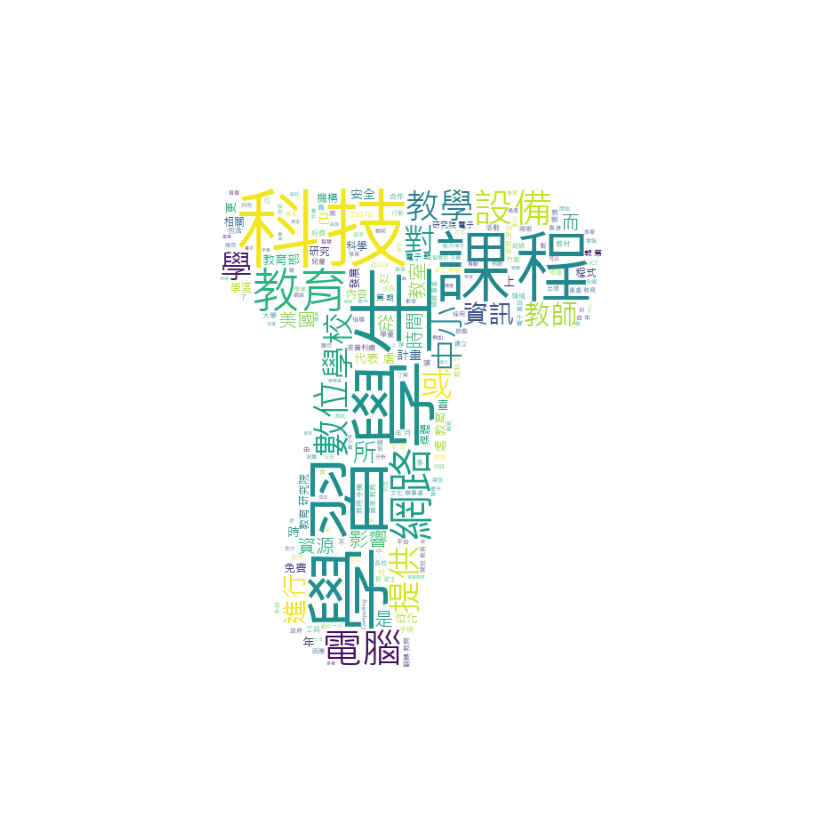

In [63]:
wordcloud = WordCloud(background_color="white", font_path=font, mask = mask)

# 生成词云
wordcloud.generate(segment_text)

# 可以使用 matplotlib 显示词云图
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# 显示词云图
plt.show()